In [39]:
import yfinance as yf
import pandas as pd

In [40]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

In [41]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [42]:
#Ex2
import requests
import pandas as pd
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

html = requests.get(url, headers=headers).text
buffer = StringIO(html)
all_tables = pd.read_html(buffer)

for df in all_tables:
    if df.shape[1] == 2:
        tesla_revenue = df.copy()
        break

tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = (
    tesla_revenue["Revenue"]
    .str.replace(r"[\$,]", "", regex=True)
    .astype(float)
)

tesla_revenue.tail()

,Date,Revenue
11,2013,2013.0
12,2012,413.0
13,2011,204.0
14,2010,117.0
15,2009,112.0


In [32]:
tesla_revenue

,Date,Revenue
0,2024,97690.0
1,2023,96773.0
2,2022,81462.0
3,2021,53823.0
4,2020,31536.0
5,2019,24578.0
6,2018,21461.0
7,2017,11759.0
8,2016,7000.0
9,2015,4046.0


In [43]:
#Ex3
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [44]:
#EX4
import requests
import pandas as pd
from io import StringIO

url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

html_gme = requests.get(url_gme, headers=headers).text
buffer_gme = StringIO(html_gme)

all_tables_gme = pd.read_html(buffer_gme)

for df in all_tables_gme:
    if df.shape[1] == 2:
        gme_revenue = df.copy()
        break

gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = (
    gme_revenue["Revenue"]
    .str.replace(r"[\$,]", "", regex=True)
    .astype(float)
)
gme_revenue.tail()


,Date,Revenue
12,2013,8887.0
13,2012,9551.0
14,2011,9474.0
15,2010,9078.0
16,2009,8806.0


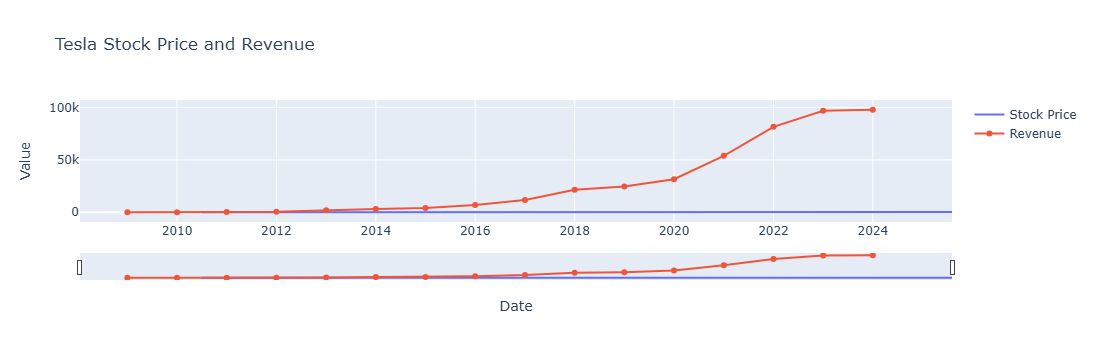

In [34]:
#Ex5
import plotly.graph_objects as go

def make_graph(stock_data, revenue_data, stock_title):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=stock_data["Date"],
        y=stock_data["Close"],
        name="Stock Price"
    ))

    fig.add_trace(go.Scatter(
        x=revenue_data["Date"],
        y=revenue_data["Revenue"].astype(float),
        name="Revenue"
    ))

    fig.update_layout(
        title=stock_title,
        xaxis_title="Date",
        yaxis_title="Value",
        xaxis_rangeslider_visible=True
    )

    fig.show()

make_graph(tesla_data, tesla_revenue, "Tesla Stock Price and Revenue")


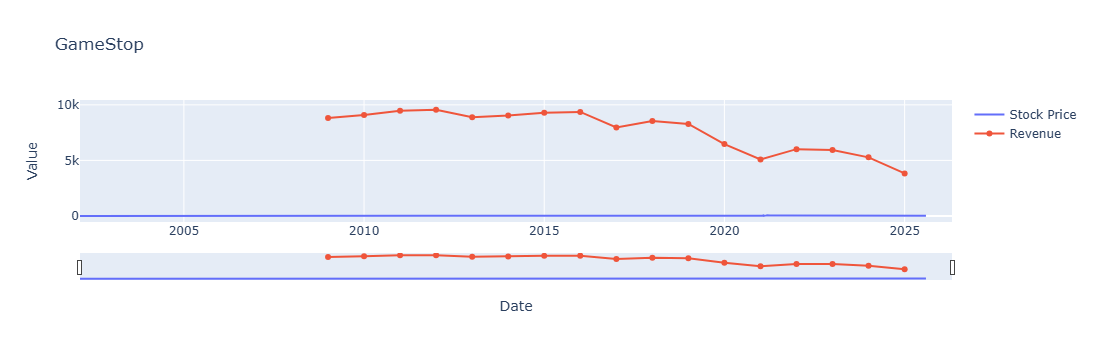

In [35]:
#Ex6
make_graph(gme_data, gme_revenue, "GameStop")
